In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
    



In [36]:
churn_df= pd.read_excel('Telco-Customer-Churn.xlsx')
churn_df.head()

C:\Users\Shahin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. Compare churn count with respect to gender


Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


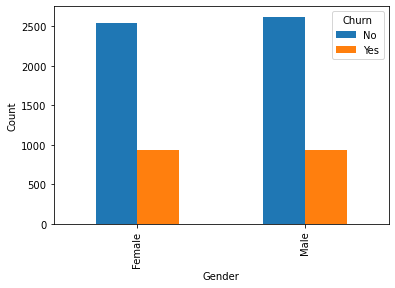

In [37]:
CrosstabResult=pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])
print(CrosstabResult)
 
# Grouped bar chart between gender and Churn

fig = CrosstabResult.plot.bar()

#Adding Label
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

2.Find out how many female senior citizens there in the dataset

In [38]:
senior_df = churn_df[(churn_df['SeniorCitizen']== 1)]
senior_female = senior_df[(senior_df['gender'] == 'Female')]
senior_female_count = (senior_female['gender']).count()
senior_female_count

568

3. Compare 'tenure' with 'Total Charges'

Text(0, 0.5, 'Total Charges')

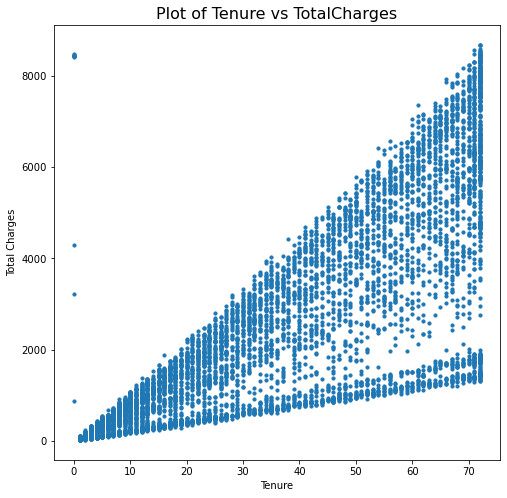

In [39]:
#Making a scatter plot
plt.figure(figsize=(8,8))
plt.scatter(churn_df['tenure'],churn_df['TotalCharges'],s=10,) 

#title and labels 
plt.title('Plot of Tenure vs TotalCharges',fontsize = 16) 
plt.xlabel('Tenure')  
plt.ylabel('Total Charges')

4.Find out which contract is preferred by the senior citizen.

Text(0, 0.5, 'Count')

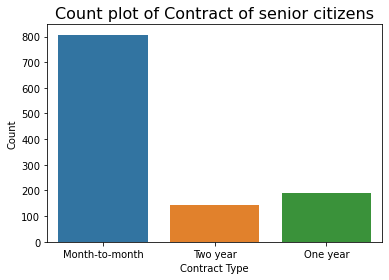

In [40]:
#using countplot to see the preference
sns.countplot(x='Contract',data = senior_df)
plt.title('Count plot of Contract of senior citizens',fontsize = 16) 
plt.xlabel('Contract Type')  #adding x and y labels
plt.ylabel('Count')


Month to month contract is preferred by senior citizen

5. Comment on your finds on Payment Method?

In [41]:
churn_df['PaymentMethod'].unique() #types of payment Method 

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

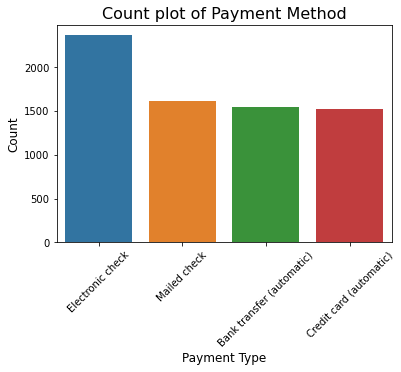

In [42]:
sns.countplot(x='PaymentMethod',data=churn_df)

plt.xticks(rotation=45)

plt.title('Count plot of Payment Method',fontsize = 16) 
plt.xlabel('Payment Type',fontsize=12)  #adding x and y labels
plt.ylabel('Count',fontsize=12)


plt.show()

Preferred payment type is Electronic check

5.Comment on your finds in payment method

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


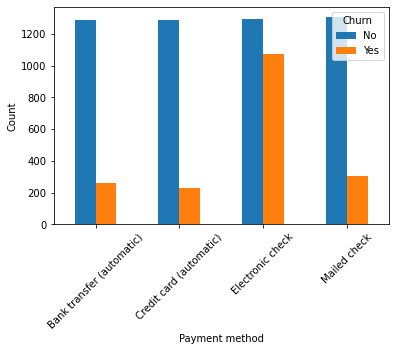

In [43]:
# payment method vs churn 
CrosstabResult=pd.crosstab(index=churn_df['PaymentMethod'],columns=churn_df['Churn'])
print(CrosstabResult)
 
# Grouped bar chart between gender and Churn

fig = CrosstabResult.plot.bar()
plt.xticks(rotation=45)

#Adding Label
plt.xlabel('Payment method')
plt.ylabel('Count')

plt.show()

Customers using electronic check has the highest churn. So consider ways to encourage them to change payment type to Automatic bank transfer or credit card tranfer.